In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import os

import pickle
import re
import torch.nn as nn
import torch.nn.functional as F

from glob import glob
from ffpyplayer.player import MediaPlayer

%matplotlib inline

In [2]:
train_img_glob = glob('data/train/*/*.jpg')
test_img_glob = glob('data/test/*.jpg')

base = os.path.dirname('')
TRAIN_DIR = os.path.join(base + 'data/train')
TEST_DIR = os.path.join(base + 'data/test')

prototxt_file = os.path.join(base + 'data/deploy.prototxt.txt')
caffemodel_file = os.path.join(base + 'data/weights.caffemodel')

In [3]:
print("Total number of training images before preprocessing:", len(train_img_glob))

Total number of training images before preprocessing: 270


In [3]:
face_model = cv2.dnn.readNetFromCaffe(prototxt_file, caffemodel_file)

In [7]:
CONFIDENCE = 0.5
IMG_SIZE = 224
ONE_HOT_LABEL = {'dahyun':0, 'juri':1, 'sohee':2, 'suyun':3, 'yeonhee':4, 'yunkyoung':5}
train_extracted_faces = []
test_extracted_faces = []
names = []
skipped = 0

# training image
for img in train_img_glob:
    a = cv2.imread(img)
    (h,w) = a.shape[:2]
    blob = cv2.dnn.blobFromImage(a, scalefactor=1.0, size=(IMG_SIZE, IMG_SIZE), 
                                 mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
    face_model.setInput(blob)
    detector = face_model.forward()
    
    if len(detector) > 0:
        i = np.argmax(detector[0,0,:,2])
        confidence = detector[0,0,i,2]
        
        if confidence > CONFIDENCE:
            rect = detector[0,0,i,3:7] * np.array([w,h,w,h])
            start_x, start_y, end_x, end_y = rect.astype('int')
            
            face = a[start_y:end_y, start_x:end_x]
            
            if face.size == 0:
                print('Skipping...')
                print('No face detected:', img)
                skipped += 1
                continue
                
            face = cv2.resize(face, (IMG_SIZE,IMG_SIZE))
            face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            cv2.rectangle(a, (start_x, start_y), (end_x, end_y), (255,255,255), 2)
            
            train_extracted_faces.append(face)
        
        else:
            print('Skipping...')
            print('Confidence below threshold:', img)
            skipped += 1
            continue
    
    label = re.findall('\\\\[a-z].*\\\\', img)[0]
    label = label[1:-1]
    
    names.append(ONE_HOT_LABEL[label])
    
# # test image
# for img in test_img_glob:
#     a = cv2.imread(img)
#     a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    
#     test_extracted_faces.append(a)
    
# save to disk
train_pickle = {'extracted_faces': train_extracted_faces, 'names': names}
# test_pickle = {'extracted_faces': test_extracted_faces}

with open('train_extracted_faces.pickle', 'wb') as f:
    pickle.dump(train_pickle, f)
    
# with open('test_extracted_faces.pickle', 'wb') as f:
#     pickle.dump(test_pickle, f)

Skipping...
No face detected: data/train\dahyun\RCPC_members-1209682000044445697-20191225_104718-img3.jpg
Skipping...
Confidence below threshold: data/train\juri\RCPC_members-1194528907459850240-20191113_151419-img3.jpg
Skipping...
Confidence below threshold: data/train\juri\RCPC_members-1209747487277215745-20191225_150731-img3.jpg
Skipping...
Confidence below threshold: data/train\suyun\RCPC_members-1193437052534018048-20191110_145540-img1.jpg
Skipping...
No face detected: data/train\yeonhee\RCPC_members-1295704768950571008-20200818_195104-img1.jpg
Skipping...
No face detected: data/train\yeonhee\yeonhee4.jpg


In [8]:
print("Training images skipped:", skipped)
print("Total number of training images after preprocessing:", len(train_extracted_faces))

Training images skipped: 6
Total number of training images after preprocessing: 264


In [33]:
a = cv2.imread('./data/twitter/RCPC_members-1209747487277215745-20191225_150731-img2.jpg')
(h,w) = a.shape[:2]
blob = cv2.dnn.blobFromImage(a, scalefactor=1.0, size=(224, 224), mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
face_model.setInput(blob)
detector = face_model.forward()
    
if len(detector) > 0:
    i = np.argmax(detector[0,0,:,2])
    confidence = detector[0,0,i,2]
        
    if confidence > CONFIDENCE:
        rect = detector[0,0,i,3:7] * np.array([w,h,w,h])
        start_x, start_y, end_x, end_y = rect.astype('int')
            
        face = a[start_y:end_y, start_x:end_x]
        face = cv2.resize(face, (IMG_SIZE,IMG_SIZE))
        cv2.rectangle(a, (start_x, start_y), (end_x, end_y), (255,255,255), 2)
        
        cv2.imshow('face', face)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
    else:
        print("no face detected!")
    

AttributeError: 'NoneType' object has no attribute 'shape'

In [34]:
a = cv2.imread('./data/twitter/RCPC_members-1198186468121776128-20191123_172809-img2.jpg')
(h,w) = a.shape[:2]
blob = cv2.dnn.blobFromImage(a, scalefactor=1.0, size=(224, 224), mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
face_model.setInput(blob)
detector = face_model.forward()
    
if len(detector) > 0:
    for i in range(0, detector.shape[2]):
        
        rect = detector[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = rect.astype("int")

        confidence = detector[0, 0, i, 2]
        if (confidence > 0.5):
            cv2.rectangle(a, (startX, startY), (endX, endY), (255, 255, 255), 2)
        
    cv2.imshow('multiface detection', a)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
        

In [ ]:
face_cascade = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml')

for img in train_img_glob:
    a = cv2.imread(img)
    gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=6)
    for (x,y,w,h) in faces:
        cv2.rectangle(a, (x,y), (x+w,y+h), (255,0,0), 2)

    cv2.imshow('img', a)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Checkpoint

(224, 224, 3)
<class 'numpy.ndarray'>


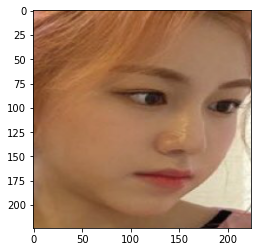

In [4]:
# load the saved extracted faces pickle
with open('train_extracted_faces.pickle', 'rb') as f:
    train_face_loader = pickle.load(f)

# with open('test_extracted_faces.pickle', 'rb') as f:
#     test_face_loader = pickle.load(f)
    
raw_train_data = list(train_face_loader.values())
# raw_test_data = list(test_face_loader.values())

plt.imshow(raw_train_data[0][1])
print(raw_train_data[0][1].shape)
print(type(raw_train_data[0][1]))

In [5]:
from torchvision import datasets, transforms

root = './data'

transform = transforms.Compose([transforms.ToTensor()])
mnist_train = datasets.MNIST(root=root, train=True, transform=transform, download=True)
mnist_val = datasets.MNIST(root=root, train=False, transform=transform, download=True)

mnist_train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=32, num_workers=0, shuffle=True)
mnist_val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=32, num_workers=0, shuffle=True)

In [6]:
print(mnist_train.data.shape)
print(mnist_train.data[0].shape)
print(mnist_train.targets)
print(mnist_train.targets.shape)
print(type(mnist_train.data))

torch.Size([60000, 28, 28])
torch.Size([28, 28])
tensor([5, 0, 4,  ..., 5, 6, 8])
torch.Size([60000])
<class 'torch.Tensor'>


In [7]:
# split between features and labels
train_features = raw_train_data[0]
train_labels = raw_train_data[1]
# test_features = raw_test_data[0]

IMG_SIZE = 224
m = len(train_features)
c = 3

x_train = np.asarray(train_features)
x_train_batch_first = x_train.reshape([m,c,IMG_SIZE,IMG_SIZE])
y_train = np.asarray(train_labels)

print(x_train.shape)
print(x_train_batch_first.shape)
print(y_train.shape)

(264, 224, 224, 3)
(264, 3, 224, 224)
(264,)


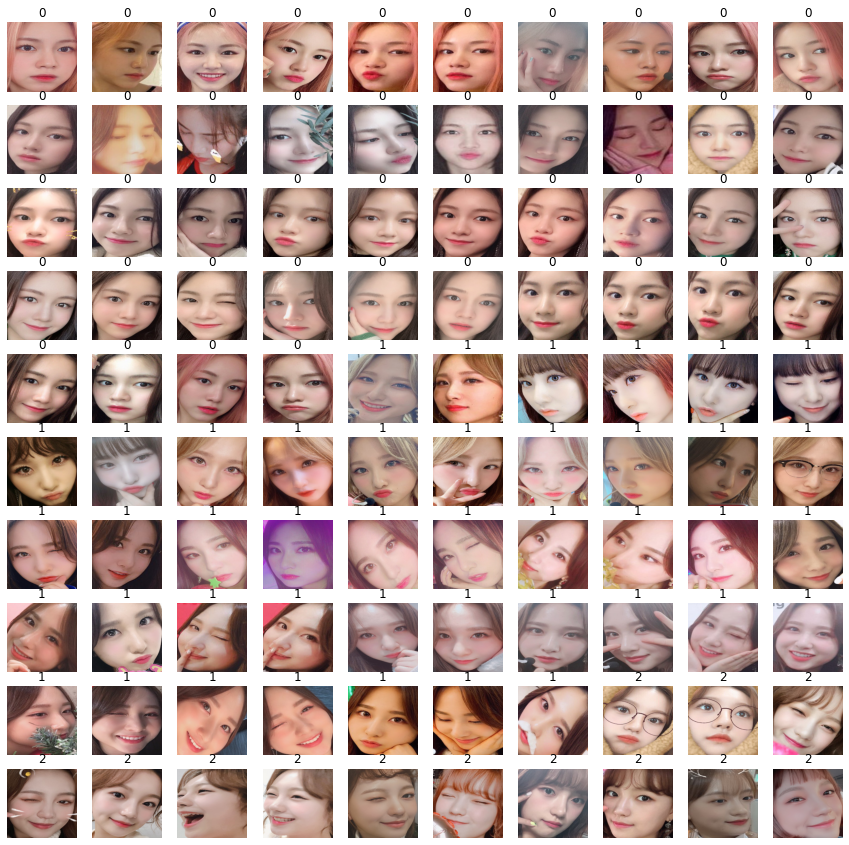

In [8]:
# show all faces for each members
fig, ax = plt.subplots(10, 10, figsize=(15,15))

for (x, y, axi) in zip(train_features, train_labels, ax.flatten()):
#     x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
    axi.imshow(x)
    axi.set_title(y)
    
    axi.axis('off')

In [13]:
BATCH_SIZE = 16
NUM_WORKERS = 0

transform = transforms.Compose([transforms.RandomVerticalFlip(0.3),
                                transforms.RandomRotation(30),
#                                 transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                transforms.ToTensor()])

train_data = torch.utils.data.TensorDataset(torch.from_numpy(x_train_batch_first), torch.from_numpy(y_train))

train_loader = torch.utils.data.DataLoader(train_data, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)

In [10]:
# temp_x, temp_y = iter(train_loader).next()
# print(temp_x[0].shape)

# fig, ax = plt.subplots(1, 6, figsize=(12,12))
# for (x, y, axi) in zip(temp_x, temp_y, ax.flatten()):
# #     x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)
#     axi.imshow(x)
#     axi.set_title(y)
#     axi.axis('off')

In [8]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=256*28*28, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=6)
        
        self.dropout = nn.Dropout(0.4)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        x = x.view(-1, 256*28*28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [10]:
gpu_availability = torch.cuda.is_available()
model = Model()

if gpu_availability:
    print('Training using GPU:', torch.cuda.get_device_name(0))
    model = model.cuda()
else:
    print('Training using CPU')

Training using GPU: GeForce RTX 2070 SUPER


NameError: name 'model' is not defined

In [55]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001)

In [56]:
def train(epochs, loaders, model, opt, crit, use_cuda, save_path='final_model.pt'):
    
    for i in range(epochs):
        training_loss = 0.0
        
        model.train()
        for batch, (data, lbl) in enumerate(loaders):
            data = data.to(torch.float32)
            lbl = lbl.to(torch.long)
            if use_cuda:
                data, lbl = data.cuda(), lbl.cuda()
                
            opt.zero_grad()
            
            output = model(data)
            loss = crit(output, lbl)
            loss.backward()
            opt.step()
            
            training_loss = training_loss + ((1/(batch+1)) * (loss.data - training_loss))
        
        print("Epoch:", i+1, "| Training Loss:", training_loss)
    
    torch.save(model.state_dict(), 'current_model.pt')
    
    return model

In [57]:
final_model = train(epochs=30, loaders=train_loader, model=model, opt=optimizer, crit=criterion, use_cuda=gpu_availability)

Epoch: 1 | Training Loss: tensor(45157.3984, device='cuda:0')
Epoch: 2 | Training Loss: tensor(1.6870, device='cuda:0')
Epoch: 3 | Training Loss: tensor(1.5907, device='cuda:0')
Epoch: 4 | Training Loss: tensor(1.4662, device='cuda:0')
Epoch: 5 | Training Loss: tensor(1.3547, device='cuda:0')
Epoch: 6 | Training Loss: tensor(1.2566, device='cuda:0')
Epoch: 7 | Training Loss: tensor(1.1796, device='cuda:0')
Epoch: 8 | Training Loss: tensor(1.0578, device='cuda:0')
Epoch: 9 | Training Loss: tensor(0.9829, device='cuda:0')
Epoch: 10 | Training Loss: tensor(0.8475, device='cuda:0')
Epoch: 11 | Training Loss: tensor(0.7485, device='cuda:0')
Epoch: 12 | Training Loss: tensor(0.7084, device='cuda:0')
Epoch: 13 | Training Loss: tensor(0.6625, device='cuda:0')
Epoch: 14 | Training Loss: tensor(0.8693, device='cuda:0')
Epoch: 15 | Training Loss: tensor(0.6710, device='cuda:0')
Epoch: 16 | Training Loss: tensor(0.4753, device='cuda:0')
Epoch: 17 | Training Loss: tensor(0.4585, device='cuda:0')
Ep

### Training History

1. 7 October 2020 - 19:44
- Batch size = 16
- Epochs = 20
- Learning rate = 0.001
- Optimizer = RMSProp
- Training loss = 0.3531

## Checkpoint 2

In [9]:
gpu_availability = torch.cuda.is_available()
model = Model()

if gpu_availability:
    print('Training using GPU:', torch.cuda.get_device_name(0))
    model = model.cuda()
else:
    print('Training using CPU')
    
model.load_state_dict(torch.load('current_model.pt'))

Training using GPU: GeForce RTX 2070 SUPER


<All keys matched successfully>

In [10]:
def predict(img_path, model, use_cuda):
    
    IMG_SIZE = 224
    NAMES = ['Dahyun', 'Juri', 'Sohee', 'Suyun', 'Yeonhee', 'Yunkyoung']
    
    test_img = cv2.imread(img_path)
    (h,w) = test_img.shape[:2]
    blob = cv2.dnn.blobFromImage(test_img, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
    face_model = cv2.dnn.readNetFromCaffe(prototxt_file, caffemodel_file)
    face_model.setInput(blob)
    detector = face_model.forward()
    
    if len(detector) > 0:
        for i in range(0, detector.shape[2]):
        
            rect = detector[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = rect.astype("int")

            confidence = detector[0, 0, i, 2]
            if (confidence > 0.5):
                cv2.rectangle(test_img, (startX, startY), (endX, endY), (255, 255, 255), 2)
                
                face = test_img[startY:endY, startX:endX]
                resized_face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
                resized_face = np.expand_dims(resized_face, axis=0)
                print(resized_face.shape)

                m = 1
                c = 3
                resized_face = np.reshape(resized_face, [m, c, IMG_SIZE, IMG_SIZE])
                print(resized_face.shape)

                test_data = torch.Tensor(resized_face)

                model.eval()

                if use_cuda:
                    test_data = test_data.cuda()

                output = model(test_data)
                print(output[0])
                pred = np.argmax(output.cpu().detach())
                print(pred)
    
                text = "{}: {:.2f}%".format(NAMES[pred], output[0][pred]/sum(output[0]) * 100)
                print(text)
            
                cv2.putText(test_img, text, (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
                
    cv2.imshow('Prediction', test_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [11]:
predict('./data/twitter/RCPC_members-1238442106487627776-20200313_192941-img1.jpg', model, use_cuda=gpu_availability)

(1, 224, 224, 3)
(1, 3, 224, 224)
tensor([12.5568, 25.0821, 25.3976, 30.9011, 28.2329, 22.1707], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor(3)
Suyun: 21.41%
(1, 224, 224, 3)
(1, 3, 224, 224)
tensor([ 7.1744,  6.5597,  8.4154, 14.2170,  7.2606,  3.9966], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor(3)
Suyun: 29.85%


In [23]:
def predict_from_video(path, model, use_cuda):
    IMG_SIZE = 224
    NAMES = ['Dahyun', 'Juri', 'Sohee', 'Suyun', 'Yeonhee', 'Yunkyoung']
    
    frame_name = 'Video'
    vid = cv2.VideoCapture(path)
#     audio = MediaPlayer(path)
    face_model = cv2.dnn.readNetFromCaffe(prototxt_file, caffemodel_file)
    
    cv2.namedWindow(frame_name, cv2.WND_PROP_FULLSCREEN)
    cv2.setWindowProperty(frame_name, cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)
    
    fps = vid.get(cv2.CAP_PROP_FPS)
    print('Video fps:', fps)
    
    while vid.isOpened():
        ret, frame = vid.read()
        (h,w) = frame.shape[:2]
#         audio_frame, val = audio.get_frame()
        
        blob = cv2.dnn.blobFromImage(frame, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0), swapRB=False, crop=False)
        face_model.setInput(blob)
        detector = face_model.forward()
        
        if len(detector) > 0:
            for i in range(0, detector.shape[2]):
                rect = detector[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = rect.astype("int")

                confidence = detector[0, 0, i, 2]
                if (confidence > 0.5):
                    cv2.rectangle(frame, (startX, startY), (endX, endY), (255, 255, 255), 2)

                    face = frame[startY:endY, startX:endX]
                    resized_face = cv2.resize(face, (IMG_SIZE, IMG_SIZE))
                    resized_face = np.expand_dims(resized_face, axis=0)
#                     print(resized_face.shape)

                    m = 1
                    c = 3
                    resized_face = np.reshape(resized_face, [m, c, IMG_SIZE, IMG_SIZE])
#                     print(resized_face.shape)

                    test_data = torch.Tensor(resized_face)

                    model.eval()

                    if use_cuda:
                        test_data = test_data.cuda()

                    output = model(test_data)
#                     print(output[0])
                    pred = np.argmax(output.cpu().detach())
#                     print(pred)

                    text = "{}: {:.2f}%".format(NAMES[pred], output[0][pred]/sum(output[0]) * 100)
#                     print(text)

                    cv2.putText(frame, text, (startX, startY-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
        
        if not ret:
            print('End of video...')
            break
            
        cv2.imshow(frame_name, frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
#         if val != 'eof' and audio_frame is not None:
#             img, t = audio_frame
        
    vid.release()
    cv2.destroyAllWindows()

In [24]:
predict_from_video('data/videos/rcpc_loveisover_mcountdown.webm', model, gpu_availability)

Video fps: 29.97002997002997
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [151 123 137]
  ...
  [ 56  23  53]
  [ 54  21  51]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 35  48  83]
  ...
  [ 69  74 126]
  [ 69  74 126]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 36  49  84]
  ...
  [ 69  75 125]
  [ 69  75 125]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [164 105 136]
  ...
  [128   0 117]
  [126   0 115]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 50  34  39]
  ...
  [ 46  25  38]
  [ 46  25  38]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 79  91 130]
  ...
  [ 33  42  82]
  [ 38  47  87]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 80  92 131]
  ...
  [ 30  39  79]
  [ 32  41  81]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [115 108 114]
  ...
  [ 42  25  39]
  [ 43  26  42]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [112 127 162]
  ..

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 77  69 100]
  ...
  [145   3 127]
  [145   3 127]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 47  36  59]
  ...
  [ 17   4  18]
  [ 18   5  19]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 45  34  57]
  ...
  [ 17   4  18]
  [ 18   5  19]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 60  38  60]
  ...
  [ 60  43  64]
  [ 56  44  64]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 43  41  79]
  ...
  [ 92  23  64]
  [ 91  22  63]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [100 113 155]
  ...
  [123  32  86]
  [123  32  86]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [101 114 156]
  ...
  [123  32  86]
  [123  32  86]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 44  45  82]
  ...
  [ 91  23  62]
  [ 89  21  60]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [131 148 178]
  ...
  [141 148 188]
  [138 145 185]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 87 111 153]
  ...
  [  7  12  39]
  [  7  12  39]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 89 111 153]
  ...
  [  8  11  36]
  [  8  11  36]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [129 151 187]
  ...
  [ 52  49  84]
  [ 53  50  85]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 63  61  99]
  ...
  [ 71  58  81]
  [ 76  63  86]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [103 110 150]
  ...
  [ 84   8  50]
  [ 84   8  50]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [103 110 150]
  ...
  [ 84   8  50]
  [ 84   8  50]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [159 172 209]
  ...
  [132 140 176]
  [138 146 182]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 45  56  84]
  ..

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 60  46  78]
  ...
  [251   0 255]
  [253   0 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [  2   0   5]
  ...
  [  8   3   9]
  [ 10   5  11]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [  2   0   5]
  ...
  [ 10   5  11]
  [ 10   5  11]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 74  58  82]
  ...
  [  9   0   0]
  [  9   0   0]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 96  89 100]
  ..

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 56  43  73]
  ...
  [ 18   6  54]
  [ 21   6  59]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 10   5  11]
  ...
  [ 11   0   9]
  [  9   1   9]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 10   5  11]
  ...
  [ 12   1  10]
  [ 10   2  10]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 51  35  47]
  ...
  [ 15   1   8]
  [ 14   1   5]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 95  80  89]
  ...
  [ 53  40  56]
  [ 53  40  56]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 14   4  11]
  ...
  [ 34  26  34]
  [ 36  28  36]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 14   4  11]
  ...
  [ 36  28  36]
  [ 38  30  38]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 43  30  60]
  ...
  [ 12   5  24]
  [ 14   5  23]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 15  19  35]
  ..

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 73  61  95]
  ...
  [ 15   7  38]
  [ 16   8  39]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 49  43  74]
  ...
  [  2   0   5]
  [  2   0   5]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 48  40  71]
  ...
  [  2   0   5]
  [  2   0   5]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 69  54  70]
  ...
  [104  87 108]
  [ 96  79 100]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 19   6  20]
  ..

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 95  81  93]
  ...
  [ 40  20  30]
  [ 36  16  26]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 34  16  26]
  ...
  [ 67  24  56]
  [ 66  23  55]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 34  16  26]
  ...
  [ 66  23  55]
  [ 66  23  55]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [108  90 100]
  ...
  [ 17   0   4]
  [ 16   0   3]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 33  17  29]
  ..

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 86  68  78]
  ...
  [105   0 121]
  [104   0 121]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 23  11  18]
  ...
  [ 31  14  22]
  [ 32  15  23]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 23  11  18]
  ...
  [ 31  14  22]
  [ 32  15  23]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 74  70  94]
  ...
  [ 60   0  47]
  [ 60   0  47]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 61  33  47]
  ...
  [ 90  75  78]
  [ 95  80  83]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 75  46  49]
  ...
  [ 68  43  54]
  [ 65  40  51]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 74  45  48]
  ...
  [ 68  43  54]
  [ 66  41  52]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 80  52  66]
  ...
  [ 85  67  72]
  [ 79  61  66]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 75  52  58]
  ..

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [200 153 124]
  ...
  [ 55  11  17]
  [ 55  11  17]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 31  23  31]
  ...
  [ 49  44  66]
  [ 47  42  64]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 33  25  33]
  ...
  [ 49  44  66]
  [ 47  42  64]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [240 196 163]
  ...
  [ 56  10  23]
  [ 58  12  25]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [105  67  64]
  ...
  [102  64  95]
  [102  64  95]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 47  11  22]
  ...
  [ 56  27  43]
  [ 56  27  45]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 47  11  22]
  ...
  [ 56  27  43]
  [ 57  28  46]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 88  43  53]
  ...
  [ 98  64  97]
  [ 98  64  97]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [215 105 194]
  ...
  [237  42  79]
  [239  44  81]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 72  57 100]
  ...
  [100  83 131]
  [100  83 131]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 65  50  93]
  ...
  [ 98  81 129]
  [ 98  81 129]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [127  91 154]
  ...
  [169 113 168]
  [170 114 169]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 76  69 116]
  ..

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 68  33  80]
  ...
  [114  33  69]
  [114  33  69]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 25  10  24]
  ...
  [ 33  17  29]
  [ 33  17  29]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 25  10  24]
  ...
  [ 34  18  30]
  [ 33  17  29]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 65  27  50]
  ...
  [ 87  12  18]
  [ 87  12  18]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 28   9  30]
  ..

  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 67  43  65]
  ...
  [ 79  45  62]
  [ 78  44  61]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [ 59  36  61]
  ...
  [ 56  38  57]
  [ 56  38  57]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 59  36  61]
  ...
  [ 56  38  57]
  [ 56  38  57]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [ 73  49  90]
  ...
  [ 38  16  33]
  [ 33  11  28]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\resize.cpp:3784: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
